In [19]:
import nltk;
from nltk.corpus import stopwords; 
from nltk.tokenize import word_tokenize;
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer 
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


In [20]:
stop_words = set(stopwords.words('english')) 
ps = PorterStemmer() 

In [21]:
name='browser'
file=open("/home/abhishek/GIT/Text_Mining/Text/History_Of_WebBrowsers.txt")

In [38]:
name='google'
file=open("/home/abhishek/GIT/Text_Mining/Text/How_Google_Works.txt")

In [39]:

line=file.read()

In [40]:
#removing puntuation words
tokenizer = RegexpTokenizer(r'\w+')
word_tokens=tokenizer.tokenize(line);

In [41]:
#removing stop words

 
filtered_sentence = [w.lower() for w in word_tokens if not w in stop_words] 

#removing plural
filtered_sentence=[ps.stem(w) for w in filtered_sentence ]

In [42]:
text=''
for words in filtered_sentence : 
    text += words + ' '

In [43]:

# simple word cloud
wordcloud = WordCloud().generate(text)
wordcloud.to_file("img/first_review_"+name+".png")

In [44]:
# modified word cloud
wordcloud = WordCloud( max_words=100, background_color="white").generate(text)
wordcloud.to_file("img/second_review_"+name+".png")

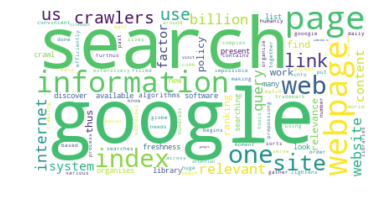

In [45]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# masked word cloud

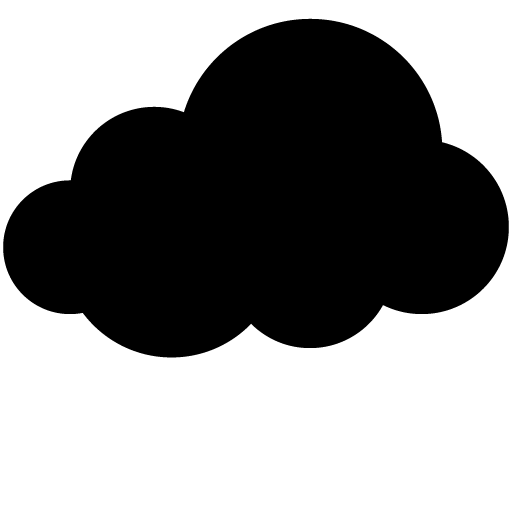

In [46]:
img=Image.open("mask/cloud.png")
img

In [47]:
# cloud_mask[0][0]

In [48]:
cloud_mask = np.array(img)
# cloud_mask[250][250][3]=0
# img1=Image.fromarray(cloud_mask)
# img1

In [49]:
def transform_format(val):
    
    if val[3] == 0:
        return 255
    else:
        return 0

In [50]:
transformed_cloud_mask = np.ndarray((cloud_mask.shape[0],cloud_mask.shape[1]), np.int32)

for i in range(len(cloud_mask)):
    for j in range(len(cloud_mask[i])):
        transformed_cloud_mask[i][j]=transform_format(cloud_mask[i][j])


In [51]:
# transformed_cloud_mask

In [52]:
#masked word cloud
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white", max_words=500, mask=transformed_cloud_mask,
               stopwords=stopwords, contour_width=3, contour_color='whitesmoke')
wordcloud=wc.generate(text)
wordcloud.to_file("img/third_review_"+name+".png")

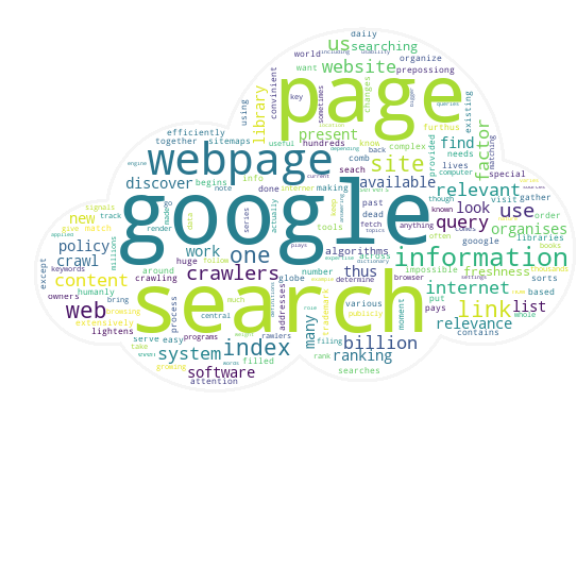

In [53]:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()